In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math 
jan1=datetime.datetime(2020, 4, 1, 0, 0, 0) 
pd.set_option('display.max_rows', 200)

In [4]:
df=pd.read_csv('us-states-new.csv')

In [5]:
la_df=df[df['state']=='Louisiana'].copy()

In [6]:
la_df.reset_index(inplace=True, drop=True)

In [7]:
la_df.drop('fips',axis=1)

,date,state,cases,deaths
0,2020-03-09,Louisiana,1,0
1,2020-03-10,Louisiana,6,0
2,2020-03-11,Louisiana,13,0
3,2020-03-12,Louisiana,14,0
4,2020-03-13,Louisiana,36,0
5,2020-03-14,Louisiana,77,1
6,2020-03-15,Louisiana,103,2
7,2020-03-16,Louisiana,137,3
8,2020-03-17,Louisiana,196,5
9,2020-03-18,Louisiana,280,7


In [8]:
la_df['new_cases']=la_df['cases'].diff()

In [9]:
la_df

,date,state,fips,cases,deaths,new_cases
0,2020-03-09,Louisiana,22,1,0,NaN
1,2020-03-10,Louisiana,22,6,0,5.0
2,2020-03-11,Louisiana,22,13,0,7.0
3,2020-03-12,Louisiana,22,14,0,1.0
4,2020-03-13,Louisiana,22,36,0,22.0
5,2020-03-14,Louisiana,22,77,1,41.0
6,2020-03-15,Louisiana,22,103,2,26.0
7,2020-03-16,Louisiana,22,137,3,34.0
8,2020-03-17,Louisiana,22,196,5,59.0
9,2020-03-18,Louisiana,22,280,7,84.0


In [10]:
for i,row in la_df.iterrows():
    if i > 2:
        la_df.loc[i,'new_cases_3']=round(sum(la_df.loc[i-2:i,'new_cases'])/3)
        
for i,row in la_df.iterrows():
    if i > 3:
        la_df.loc[i,'R3']=la_df.loc[i,'new_cases_3']/la_df.loc[i-1,'new_cases_3']
        
for i,row in la_df.iterrows():
    if i > 3:
        la_df.loc[i,'R0']=la_df.loc[i,'new_cases']/la_df.loc[i-1,'new_cases']

# la_df['R3']=la_df['cases'].diff()

In [11]:
la_df

,date,state,fips,cases,deaths,new_cases,new_cases_3,R3,R0
0,2020-03-09,Louisiana,22,1,0,NaN,NaN,NaN,NaN
1,2020-03-10,Louisiana,22,6,0,5.0,NaN,NaN,NaN
2,2020-03-11,Louisiana,22,13,0,7.0,NaN,NaN,NaN
3,2020-03-12,Louisiana,22,14,0,1.0,4.0,NaN,NaN
4,2020-03-13,Louisiana,22,36,0,22.0,10.0,2.500000,22.000000
5,2020-03-14,Louisiana,22,77,1,41.0,21.0,2.100000,1.863636
6,2020-03-15,Louisiana,22,103,2,26.0,30.0,1.428571,0.634146
7,2020-03-16,Louisiana,22,137,3,34.0,34.0,1.133333,1.307692
8,2020-03-17,Louisiana,22,196,5,59.0,40.0,1.176471,1.735294
9,2020-03-18,Louisiana,22,280,7,84.0,59.0,1.475000,1.423729


In [12]:
round(la_df[8:]['R0'].mean(),2)

1.48

In [13]:
states=df['state'].unique()
states.sort()

In [14]:
def get_r0_by_state(state):
    la_df=df[df['state']==state].copy()
    la_df.reset_index(inplace=True, drop=True)
    la_df['new_cases']=la_df['cases'].diff()
    for i,row in la_df.iterrows():
        if i > 3 and la_df.loc[i,'cases']>100:
            if la_df.loc[i-1,'new_cases'] > 75:
                la_df.loc[i,'R0']=la_df.loc[i,'new_cases']/la_df.loc[i-1,'new_cases']
    
    try:
        print(state,round(la_df[8:]['R0'].mean(),2))
    except:
        pass
for state in states:
    get_r0_by_state(state)

Alabama 1.12
Arizona 1.1
Arkansas 0.62
California 1.14
Colorado 1.09
Connecticut 1.41
Delaware 1.14
District of Columbia 1.0
Florida 1.14
Georgia 1.29
Guam 0.1
Idaho 0.99
Illinois 1.21
Indiana 1.13
Iowa 1.0
Kansas 0.69
Kentucky 0.59
Louisiana 1.31
Maryland 1.29
Massachusetts 1.24
Michigan 1.11
Minnesota 0.97
Mississippi 1.08
Missouri 1.25
Nevada 1.12
New Hampshire 0.59
New Jersey 1.3
New Mexico 0.65
New York 1.25
North Carolina 0.97
Ohio 1.11
Oklahoma 0.96
Oregon 0.68
Pennsylvania 1.2
Rhode Island 1.06
South Carolina 0.99
Tennessee 1.13
Texas 1.24
Utah 1.02
Virginia 1.14
Washington 1.27
Wisconsin 1.05


In [15]:
ca_df=df[df['state']=='Guam'].copy()

In [16]:
ca_df

,date,state,fips,cases,deaths
700,2020-03-15,Guam,66,3,0
753,2020-03-16,Guam,66,3,0
806,2020-03-17,Guam,66,3,0
860,2020-03-18,Guam,66,8,0
914,2020-03-19,Guam,66,12,0
968,2020-03-20,Guam,66,14,0
1022,2020-03-21,Guam,66,15,0
1076,2020-03-22,Guam,66,27,1
1130,2020-03-23,Guam,66,29,1
1184,2020-03-24,Guam,66,32,1


In [17]:
ca_df.reset_index(inplace=True, drop=True)
ca_df['new_cases']=ca_df['cases'].diff()
for i,row in ca_df.iterrows():
    if i > 3 and ca_df.loc[i,'cases']>100:
        ca_df.loc[i,'R0']=ca_df.loc[i,'new_cases']/ca_df.loc[i-1,'new_cases']

In [18]:
la_df

,date,state,fips,cases,deaths,new_cases,new_cases_3,R3,R0
0,2020-03-09,Louisiana,22,1,0,NaN,NaN,NaN,NaN
1,2020-03-10,Louisiana,22,6,0,5.0,NaN,NaN,NaN
2,2020-03-11,Louisiana,22,13,0,7.0,NaN,NaN,NaN
3,2020-03-12,Louisiana,22,14,0,1.0,4.0,NaN,NaN
4,2020-03-13,Louisiana,22,36,0,22.0,10.0,2.500000,22.000000
5,2020-03-14,Louisiana,22,77,1,41.0,21.0,2.100000,1.863636
6,2020-03-15,Louisiana,22,103,2,26.0,30.0,1.428571,0.634146
7,2020-03-16,Louisiana,22,137,3,34.0,34.0,1.133333,1.307692
8,2020-03-17,Louisiana,22,196,5,59.0,40.0,1.176471,1.735294
9,2020-03-18,Louisiana,22,280,7,84.0,59.0,1.475000,1.423729


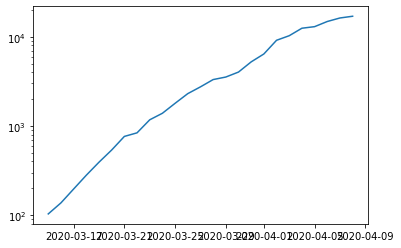

In [19]:
index=la_df['cases']>100
plt.semilogy(pd.to_datetime(la_df[index]['date']),la_df[index]['cases'],)

# ticks=plt.xticks()
# ticks=pd.to_datetime(ticks).apply(lambda x: x.month)
# plt.xlabel()

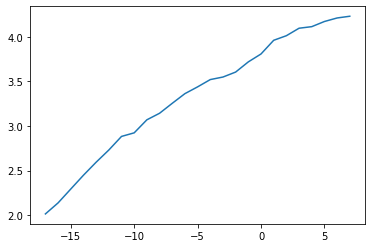

In [20]:
index=la_df['cases']>100
plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
         la_df[index]['cases'].apply(lambda x: math.log(x,10))
        )

In [21]:
import statsmodels.api as sm

In [22]:
X = pd.to_datetime(la_df[index]['date'])
X = X.apply(lambda x: (x-jan1).days)
Y = la_df[index]['cases'].apply(lambda x: math.log(x,10))

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     995.5
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.95e-20
Time:                        23:21:04   Log-Likelihood:                 21.821
No. Observations:                  25   AIC:                            -39.64
Df Residuals:                      23   BIC:                            -37.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7925      0.026    147.862      0.0

In [23]:
10**0.1082

1.2829212537094017

In [24]:
10**(0.1082+.004)

1.2947919779153318

In [25]:
10**(0.1082-.004)

1.271159360957154

Text(0, 0.5, 'log10(infected)')

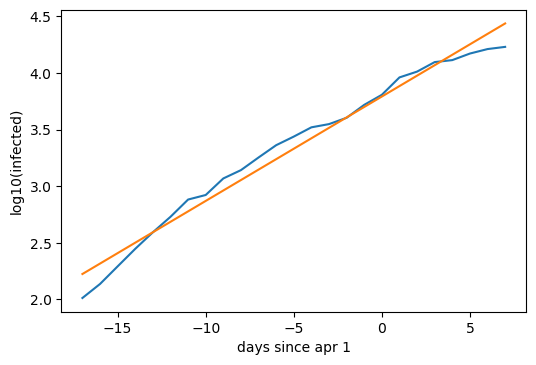

In [26]:
plt.rcParams['figure.dpi'] = 100
index=la_df['cases']>100
plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
         la_df[index]['cases'].apply(lambda x: math.log(x,10))
        )
plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
         predictions
        )
plt.xlabel('days since apr 1')
plt.ylabel('log10(infected)')

Louisiana
3.7925493420014638 0.09222382659858575
3.7925493420014638 0.09222382659858575
3.7925493420014638 0.09222382659858575
7
Apr -109 - 72
Apr -108 - 89
Apr -107 - 110
Apr -106 - 136
Apr -105 - 168
Apr -104 - 207
Apr -103 - 257
Apr -102 - 317
Apr -101 - 392
Apr -100 - 485
Apr -99 - 600
Apr -98 - 742
Apr -97 - 917
Apr -96 - 1134
Apr -95 - 1403
Apr -94 - 1735
Apr -93 - 2145
Apr -92 - 2652
Apr -91 - 3280
Apr -90 - 4056
Apr -89 - 5016
Apr -88 - 6202
Apr -87 - 7670
Apr -86 - 9484
Apr -85 - 11728
Apr -84 - 14503
Apr -83 - 17934
Apr -82 - 22176
Apr -81 - 27423
Apr -80 - 33911
Apr -79 - 41934
Apr -78 - 51855
Apr -77 - 64123


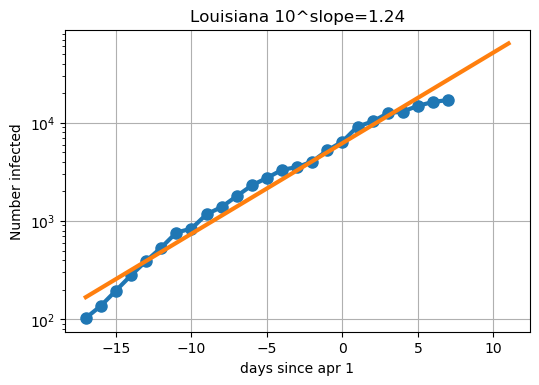

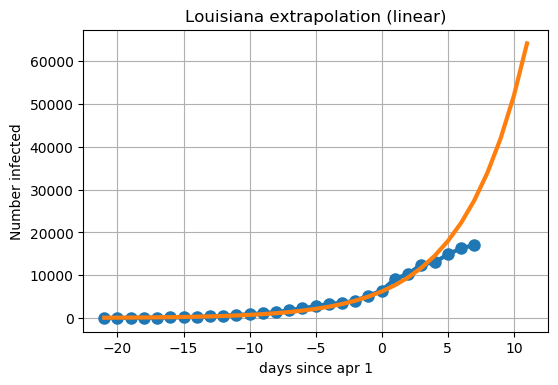

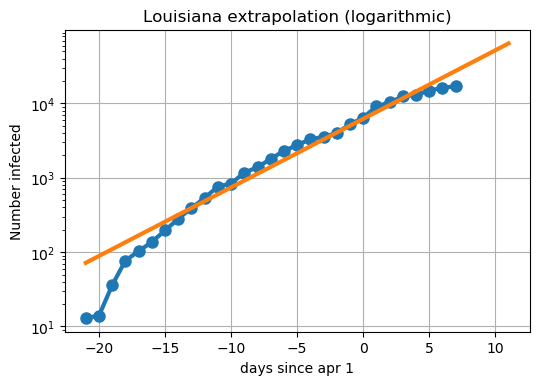

In [56]:
def fit_slope_coef(state):
    print(state)
    la_df=df[df['state']==state].copy()
    index=la_df['cases']>100
    X = pd.to_datetime(la_df[index]['date'])
    X = X.apply(lambda x: (x-jan1).days)
    Y = la_df[index]['cases'].apply(lambda x: math.log(x,10))

    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    err=10**(model.params.date+model.bse.date)-10**(model.params.date-model.bse.date)
    err=err/2
#     plt.figure()
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#          la_df[index]['cases'].apply(lambda x: math.log(x,10)),'o-',
#          label="Data",linewidth=3, markersize=8
#         )
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#              predictions,
#          label="Fit",linewidth=3
#             )
#     plt.xlabel('days since apr 1')
#     plt.ylabel('log10(infected)')
#     plt.title(state+' 10^slope='+str(round(10**model.params.date,2)))
#     plt.legend()
#     plt.grid()
# #     plt.xlim(60,90)
# #     plt.xticks([int(x) for x in plt.xticks()])
#     plt.savefig('state_plots/'+state+'_new.png')
    plt.figure()
    ran = range(min(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)),
           max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days))+5)
    predictions = [x*model.params.date + model.params.const for x in list(ran)]
    print(model.params.const,model.params.date)
    plt.semilogy(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
     la_df[index]['cases'],'o-',
     label="Data",linewidth=3, markersize=8
    )
    plt.semilogy(ran,
             10**np.array(predictions),
         label="Fit",linewidth=3
            )
    plt.title(state+' 10^slope='+str(round(10**model.params.date,2)))
    plt.xlabel('days since apr 1')
    plt.ylabel('Number infected')
    plt.grid()
    plt.savefig('state_plots/'+state+'_newlog.png')
    
    return 10**model.params.date,err,state,model
sts='Louisiana'
x=fit_slope_coef(sts)
la_df=df[df['state']==sts].copy()
index=la_df['cases']>10
a,b,c,model=x
plt.figure()
plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
     la_df[index]['cases'],'o-',
     label="Data",linewidth=3, markersize=8
    )
plt.grid()
ran = range(min(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)),
           max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days))+5)
predictions = [x*model.params.date + model.params.const for x in list(ran)]
print(model.params.const,model.params.date)
plt.plot(ran,
         10**np.array(predictions),
     label="Fit",linewidth=3
        )
plt.title(sts+' extrapolation (linear)')
plt.xlabel('days since apr 1')
plt.ylabel('Number infected')
plt.figure()
plt.semilogy(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
     la_df[index]['cases'],'o-',
     label="Data",linewidth=3, markersize=8
    )

predictions = [x*model.params.date + model.params.const for x in list(ran)]
print(model.params.const,model.params.date)
plt.semilogy(ran,
         10**np.array(predictions),
     label="Fit",linewidth=3
        )
plt.title(sts+' extrapolation (logarithmic)')
plt.xlabel('days since apr 1')
plt.ylabel('Number infected')
plt.grid()
print(max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)))
for i,j in enumerate(ran):
    print('Apr '+str(j-88),'-',int(round(10**predictions[i])))

Alabama
3.0156276940582654 0.07138349386511236
Alaska
2.140555491800654 0.029838995904217416
Arizona
3.082826799174836 0.07416511404699666
Arkansas
2.7589587837606127 0.047974189443027136
California
3.9514020228547566 0.07405287239628691
Colorado
3.462026668947601 0.0735184133965821
Connecticut
3.467120327419722 0.08932160395789246
Delaware
2.5593065405801196 0.06733892818170167
District of Columbia
2.75291523393372 0.06138776267288763
Florida
3.816298822220233 0.09021069561275191
Georgia
3.597447150215255 0.08272122609949861
Guam
2.154670217073458 0.05679891609504258
Hawaii
2.368888378693434 0.04698128244558707
Idaho
2.738234211124593 0.07318897826056042
Illinois
3.779984810159931 0.08763065681931276
Indiana
3.318754917721061 0.09078354805507331
Iowa
2.682890915775104 0.06605158113889434
Kansas
2.6472945760511957 0.06074522394692984
Kentucky
2.7658164389627116 0.06526399418745168
Louisiana
3.7925493420014638 0.09222382659858575
Maine
2.4897912059083964 0.04632600989885072
Maryland
3.2

C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Massachusetts
3.800728454349172 0.09147638973539536


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Michigan
3.890563791582071 0.08577979103329933
Minnesota
2.7922371766953074 0.05040859486164523


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Mississippi
2.985610576498472 0.06040654446719598
Missouri
3.111598358974298 0.07874621604558907


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Montana
2.317004532361561 0.03607140142787647
Nebraska
2.3504076107764087 0.057975851429352965


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Nevada
3.0419806939361544 0.06432626778999603
New Hampshire
2.5728793171733466 0.05981805067012906


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


New Jersey
4.257243766949977 0.1042240371776047
New Mexico
2.544438724529093

C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 0.061343434357936405
New York
4.902484743722354 0.11026733760813948


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


North Carolina
3.165559925510636 0.0736378134220002


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


North Dakota
2.1474769413953245 0.039275042663187876
Ohio
3.336736695318984 0.07899596878816398


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Oklahoma
2.7997409615602447 0.07233897430312133
Oregon
2.8192882241164843 0.05634409524243769


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Pennsylvania
3.7072888748243664 0.10163876936685323
Puerto Rico
2.4025332963418005 0.06458751122842095


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Rhode Island
2.690347145522835 0.07337236961451954
South Carolina
3.0526366777173304 0.06851693890505123


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


South Dakota
2.1251716117997335 0.06605705565667298
Tennessee
3.3156747310358243 0.06837697945193537


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Texas
3.5751961267448458 0.08425933165802732
Utah
2.953340097895057 0.06353481568914492


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Vermont
2.493226879596227 0.047865157092203035
Virginia
3.124508118022506 0.07797239955201214


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Washington
3.7610311846291338 0.057852221668380215


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


West Virginia
2.274041969306814 0.057091418955671075
Wisconsin
3.1487724912768966 0.06257248978307083


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wyoming
2.1414659326225696 0.03529020412187016


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


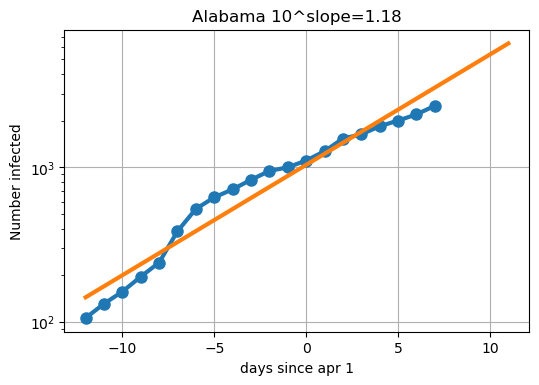

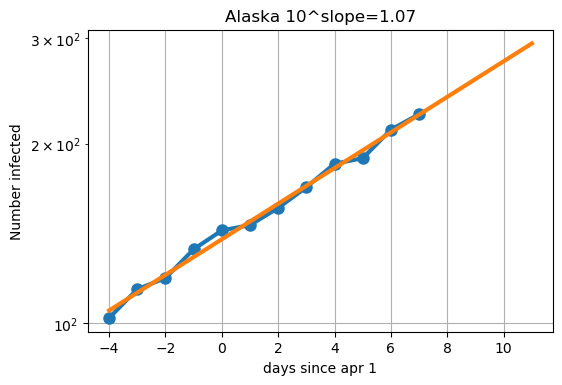

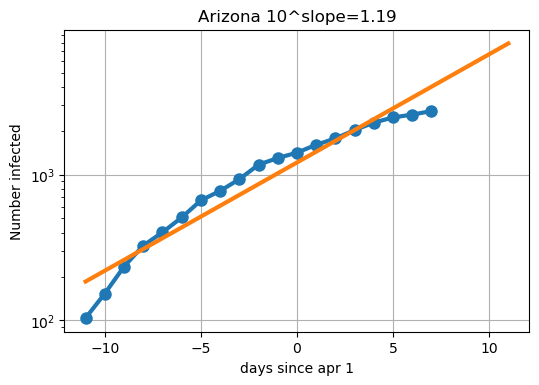

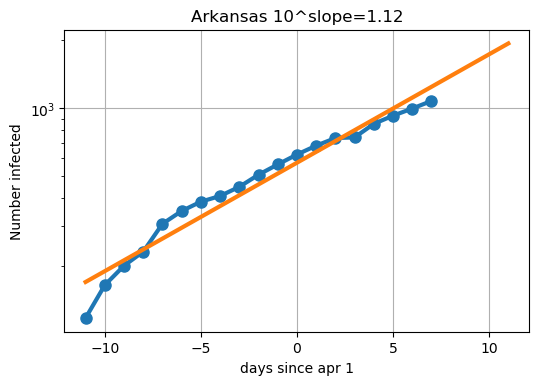

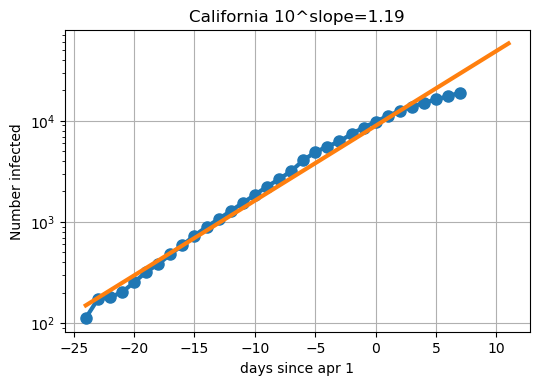

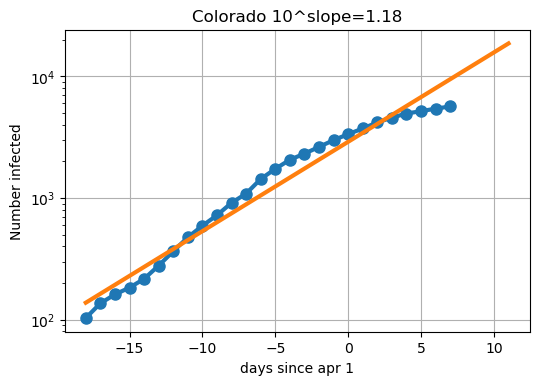

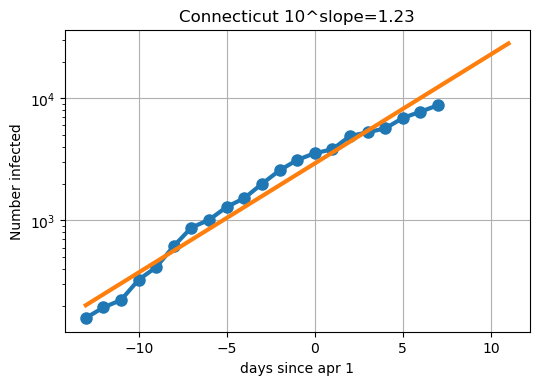

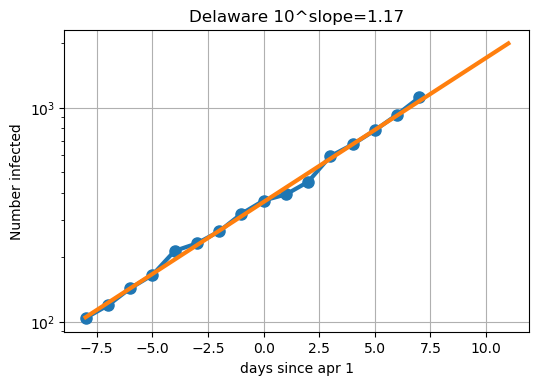

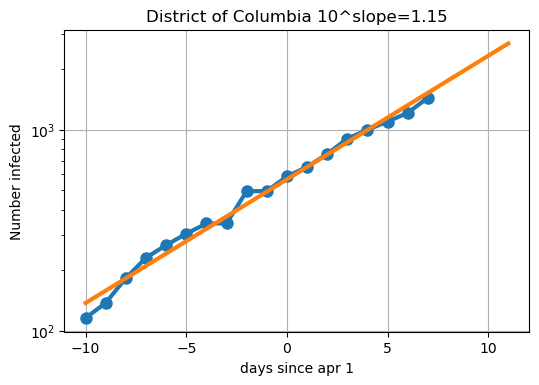

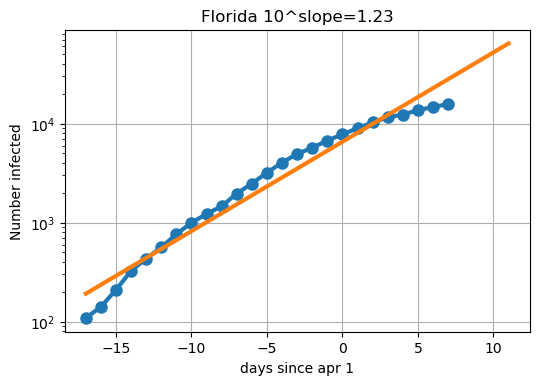

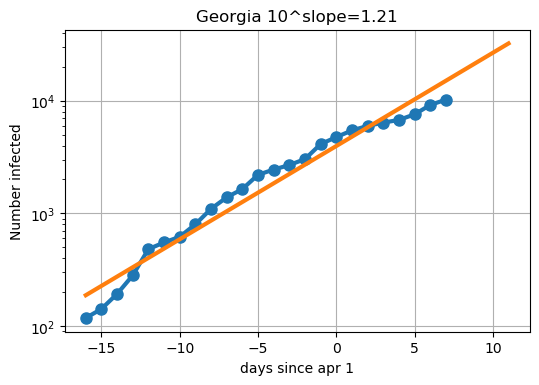

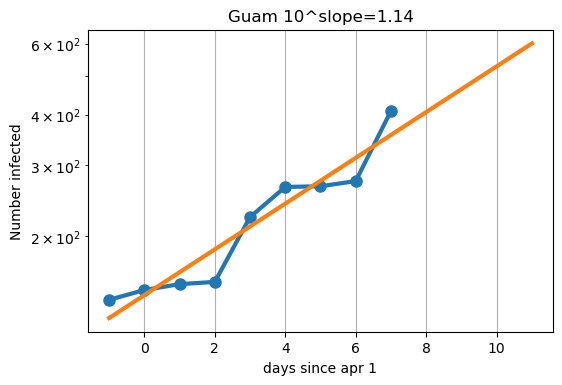

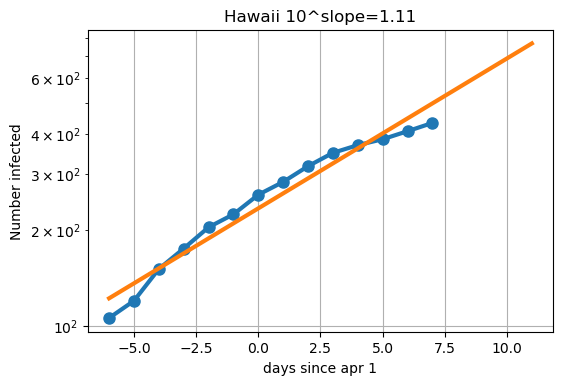

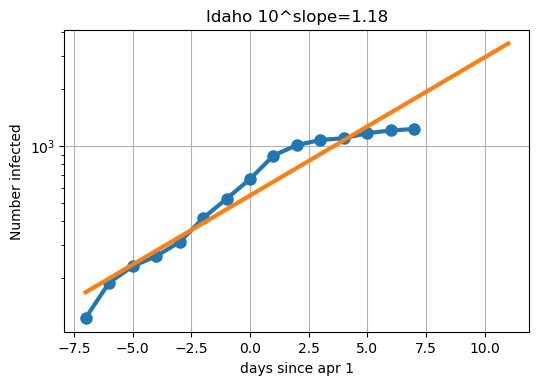

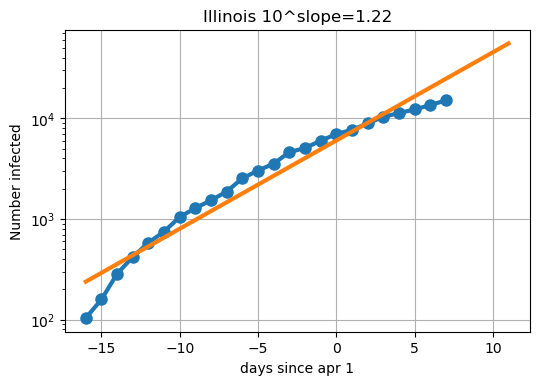

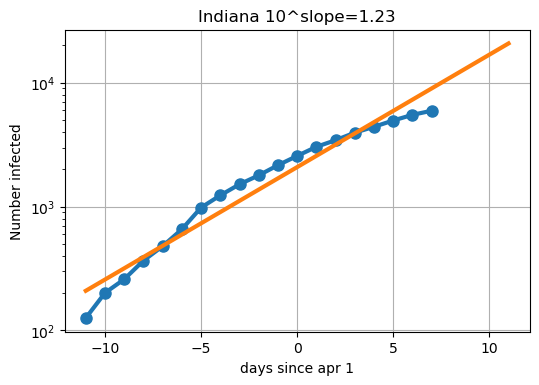

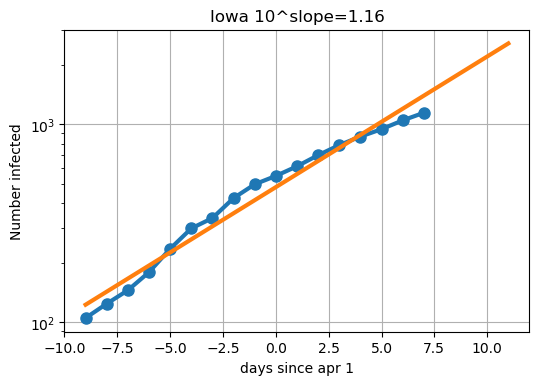

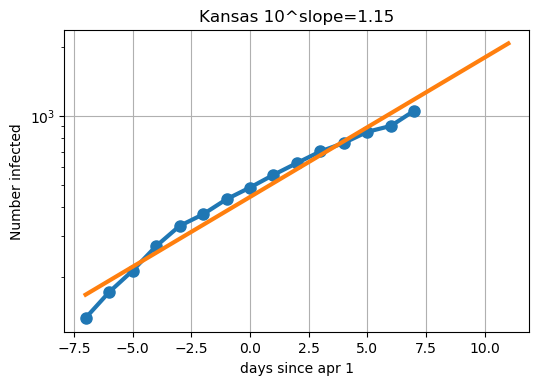

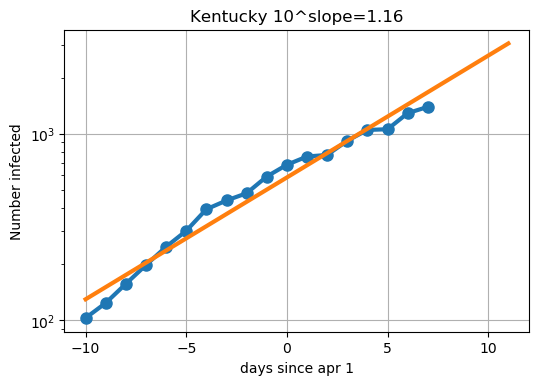

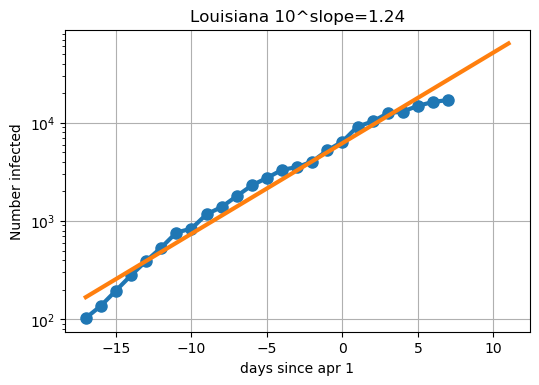

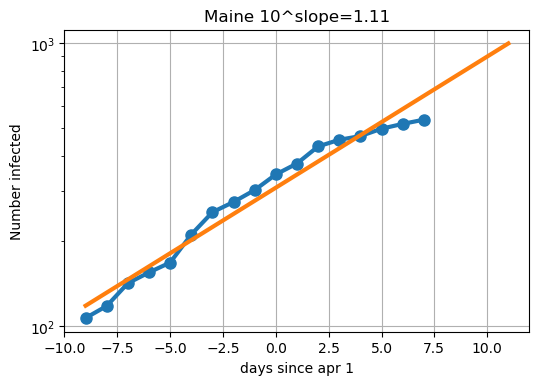

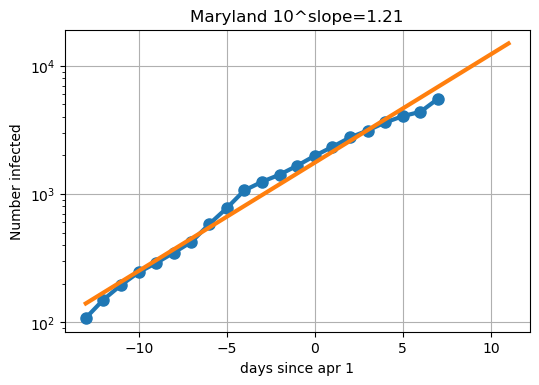

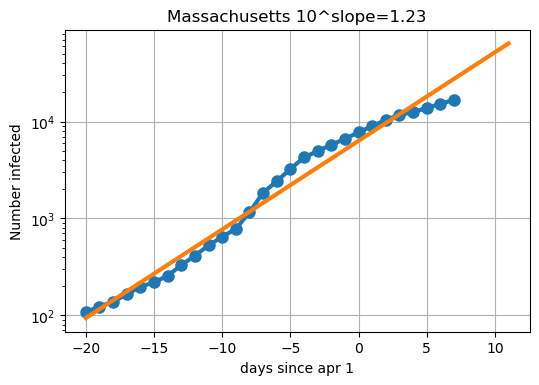

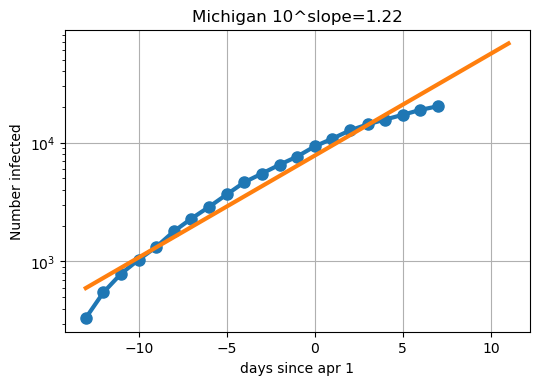

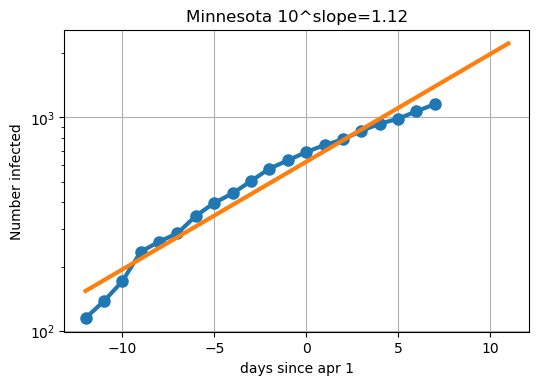

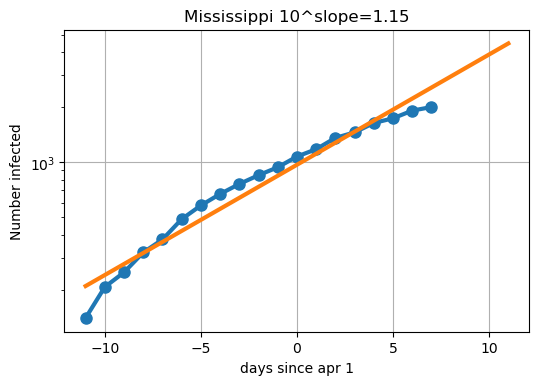

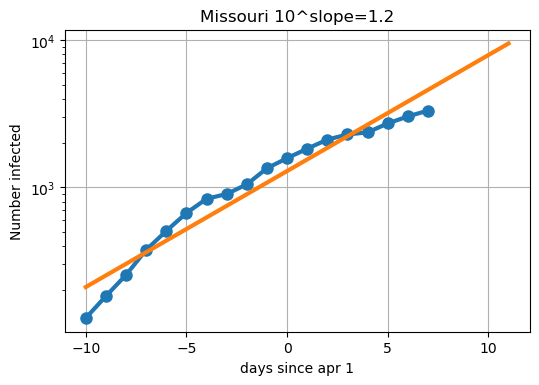

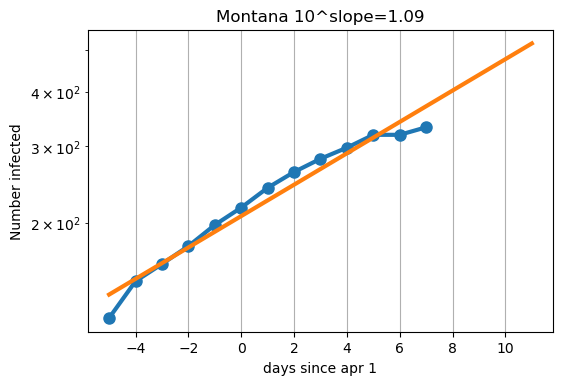

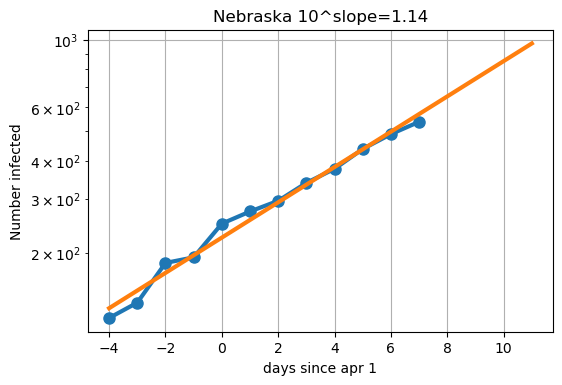

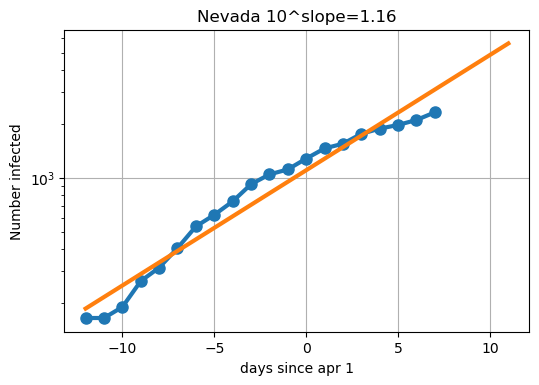

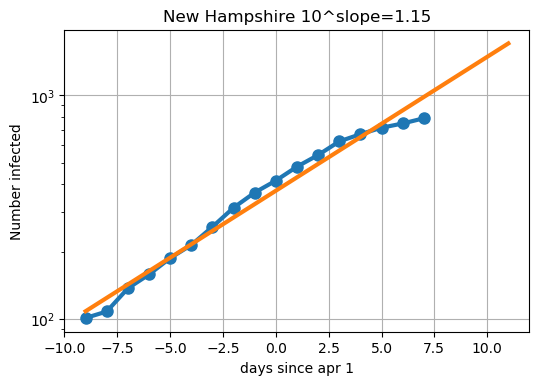

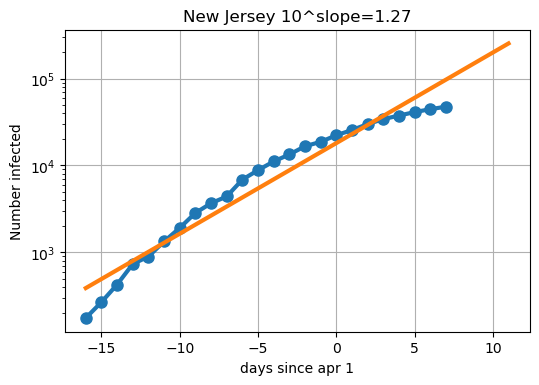

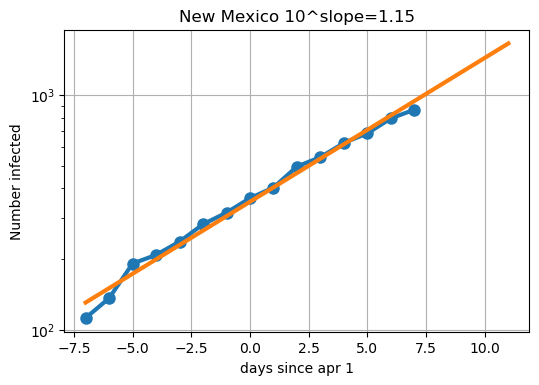

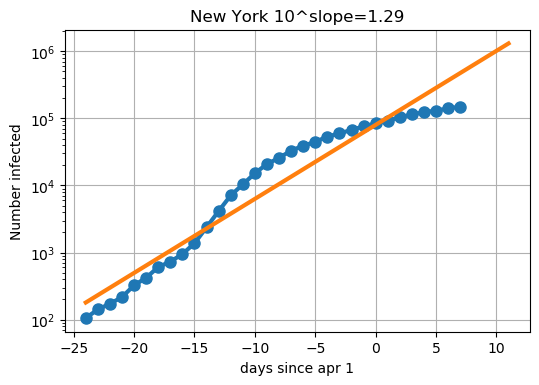

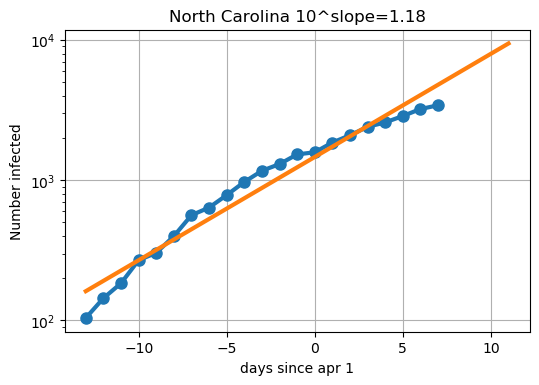

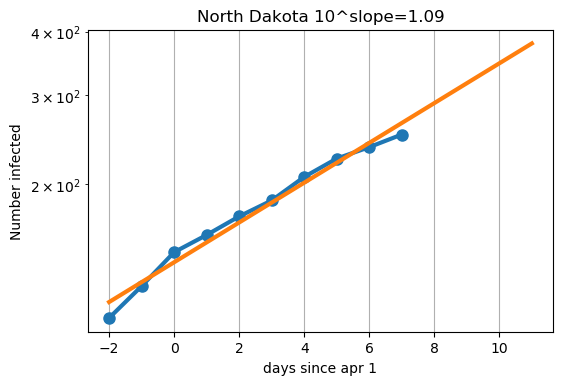

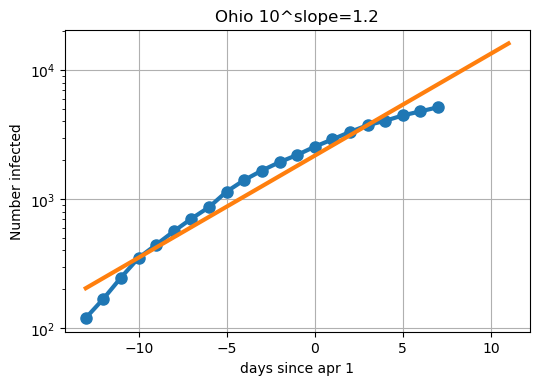

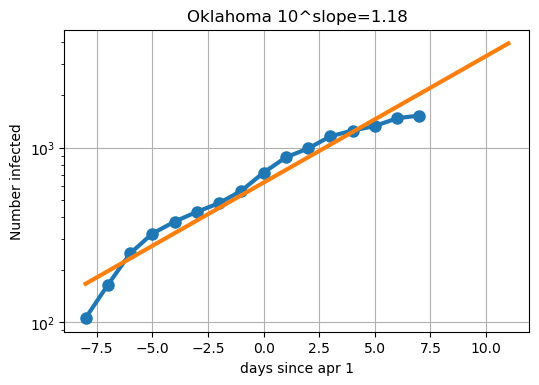

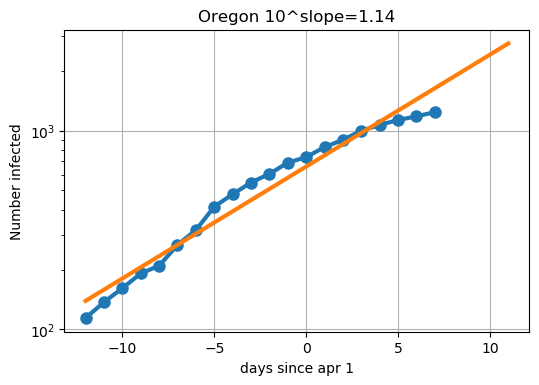

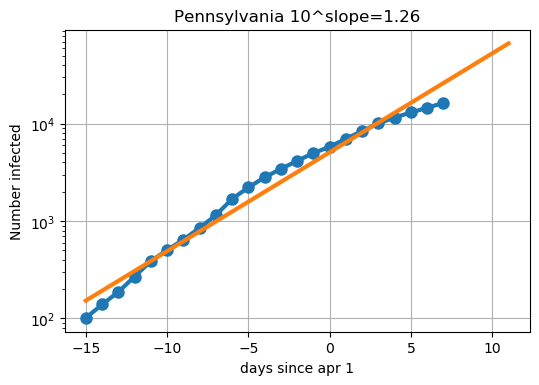

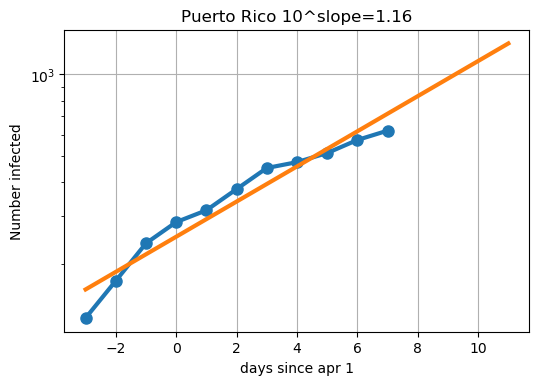

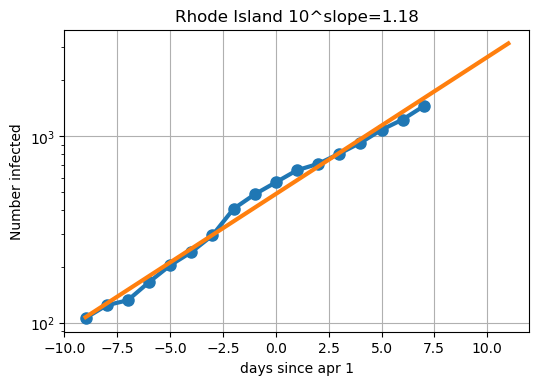

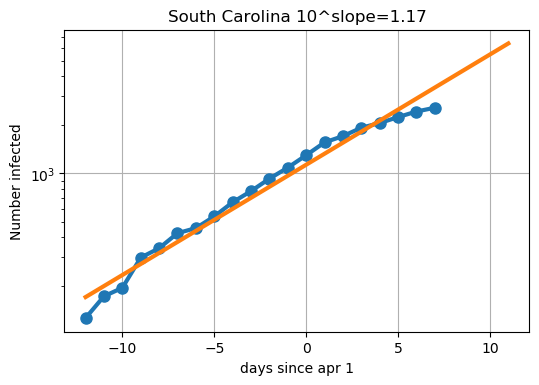

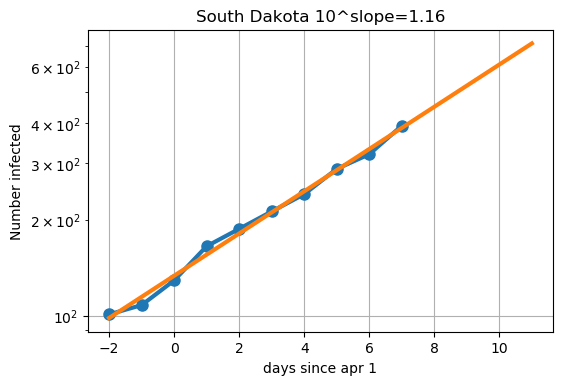

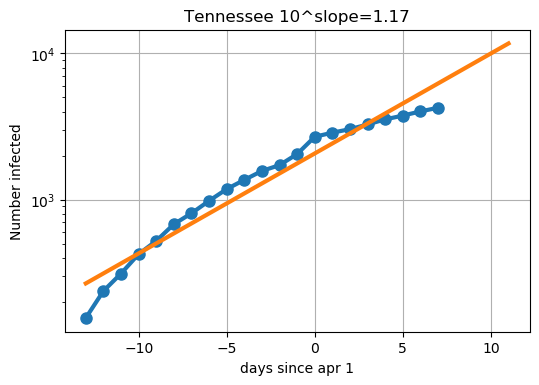

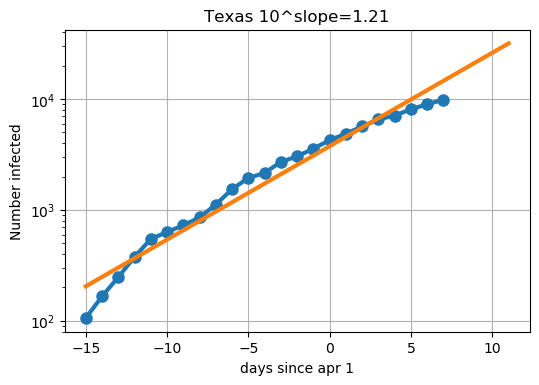

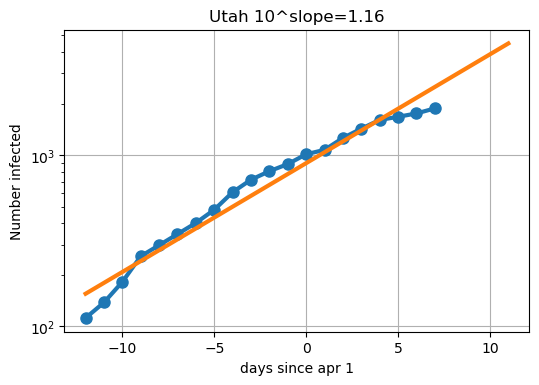

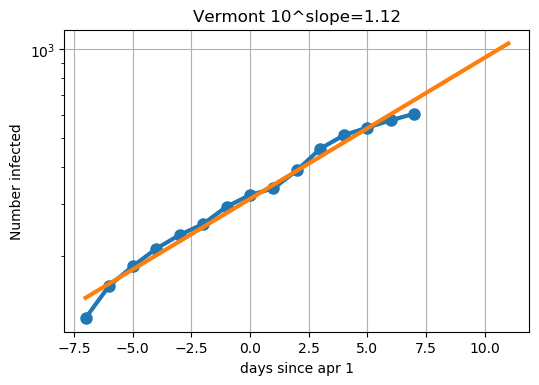

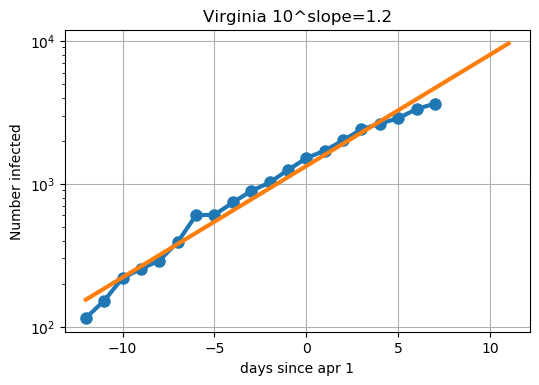

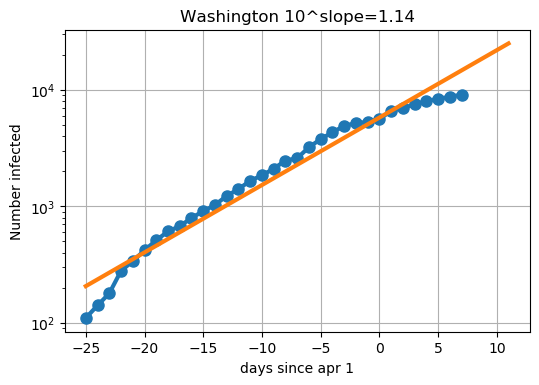

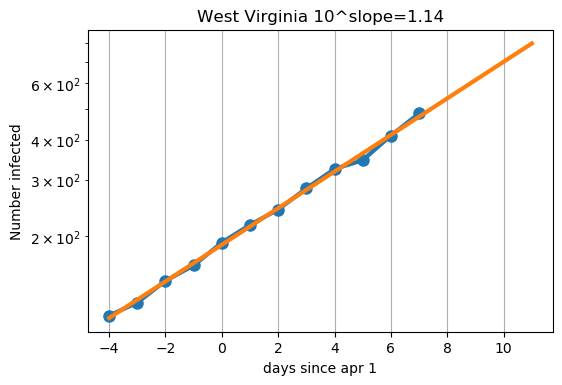

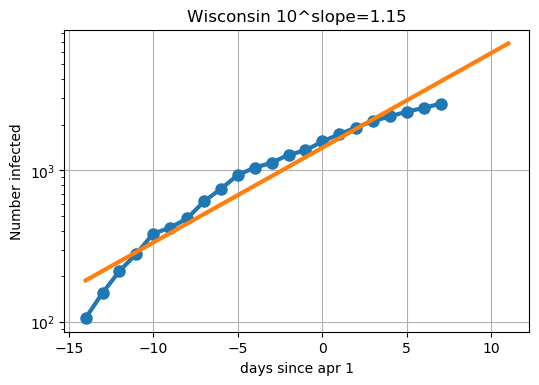

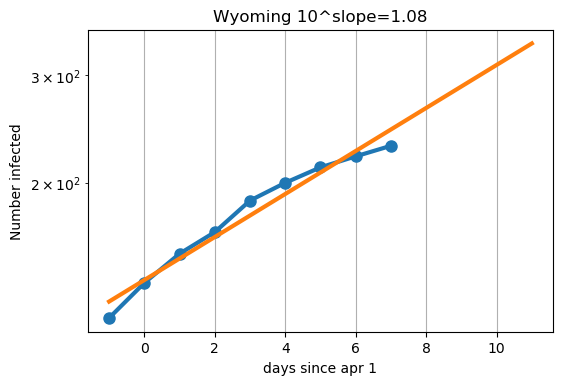

In [57]:
states=df['state'].unique()
states.sort()
fitted_data=[]
for state in states:
#     if state == 'Guam':
#         continue
    if state == 'Northern Mariana Islands':
        continue
    if state == 'Virgin Islands':
        continue
#     if state == 'Wyoming':
#         continue
#     if state == 'North Dakota':
#         continue
#     if state == 'South Dakota':
#         continue
#     if state == 'Puerto Rico':
#         continue
#     if state == 'West Virginia':
#         continue
#     if state == 'Montana':
#         continue
#     if state == 'Alaska':
#         continue
#     if state >= 'Maryland':
#         continue
    x=fit_slope_coef(state)
    fitted_data.append(x)

In [27]:
d={}
i=1
for r,_,state,__ in fitted_data:
    print(i,state,str(int(round((r-1)*100)))+'%')
    i+=1
    d[state]=r

1 Alabama 18%
2 Arizona 19%
3 Arkansas 12%
4 California 19%
5 Colorado 18%
6 Connecticut 23%
7 Delaware 17%
8 District of Columbia 15%
9 Florida 23%
10 Georgia 21%
11 Hawaii 11%
12 Idaho 18%
13 Illinois 22%
14 Indiana 23%
15 Iowa 16%
16 Kansas 15%
17 Kentucky 16%
18 Louisiana 24%
19 Maine 11%
20 Maryland 21%
21 Massachusetts 23%
22 Michigan 22%
23 Minnesota 12%
24 Mississippi 15%
25 Missouri 20%
26 Nebraska 14%
27 Nevada 16%
28 New Hampshire 15%
29 New Jersey 27%
30 New Mexico 15%
31 New York 29%
32 North Carolina 18%
33 Ohio 20%
34 Oklahoma 18%
35 Oregon 14%
36 Pennsylvania 26%
37 Rhode Island 18%
38 South Carolina 17%
39 Tennessee 17%
40 Texas 21%
41 Utah 16%
42 Vermont 12%
43 Virginia 20%
44 Washington 14%
45 Wisconsin 15%


In [28]:
ds={k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}

In [29]:
i=1
for key in ds:
    print(i,key,'-',str(int(round((ds[key]-1)*100)))+'%')
    i+=1

1 New York - 29%
2 New Jersey - 27%
3 Pennsylvania - 26%
4 Louisiana - 24%
5 Massachusetts - 23%
6 Indiana - 23%
7 Florida - 23%
8 Connecticut - 23%
9 Illinois - 22%
10 Michigan - 22%
11 Maryland - 21%
12 Texas - 21%
13 Georgia - 21%
14 Ohio - 20%
15 Missouri - 20%
16 Virginia - 20%
17 Arizona - 19%
18 California - 19%
19 North Carolina - 18%
20 Colorado - 18%
21 Rhode Island - 18%
22 Idaho - 18%
23 Oklahoma - 18%
24 Alabama - 18%
25 South Carolina - 17%
26 Tennessee - 17%
27 Delaware - 17%
28 Iowa - 16%
29 Kentucky - 16%
30 Nevada - 16%
31 Utah - 16%
32 Wisconsin - 15%
33 District of Columbia - 15%
34 New Mexico - 15%
35 Kansas - 15%
36 Mississippi - 15%
37 New Hampshire - 15%
38 Nebraska - 14%
39 Washington - 14%
40 Oregon - 14%
41 Minnesota - 12%
42 Arkansas - 12%
43 Vermont - 12%
44 Hawaii - 11%
45 Maine - 11%


Louisiana
Louisiana
3.9310636363552316 0.045819062446933234


<Figure size 600x400 with 0 Axes>

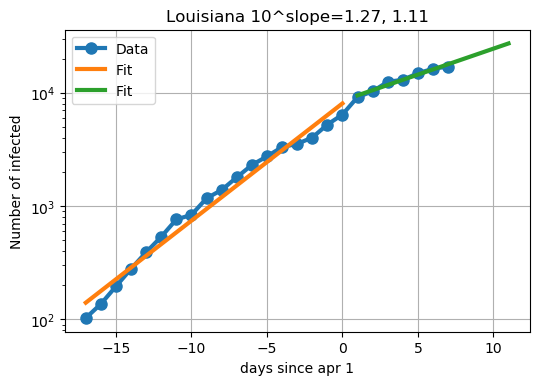

In [49]:
def fit_slope_coef(state):
    print(state)
    la_df=df[df['state']==state].copy()
    index=(la_df['cases']>100)&(la_df['date']<='2020-04-01')
    X = pd.to_datetime(la_df[index]['date'])
    X = X.apply(lambda x: (x-jan1).days)
    Y = la_df[index]['cases'].apply(lambda x: math.log(x,10))

    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    err=10**(model.params.date+model.bse.date)-10**(model.params.date-model.bse.date)
    err=err/2
#     plt.figure()
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#          la_df[index]['cases'].apply(lambda x: math.log(x,10)),'o-',
#          label="Data",linewidth=3, markersize=8
#         )
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#              predictions,
#          label="Fit",linewidth=3
#             )
    predictions_old=predictions
    x_old=pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)
    model_old=model
#     plt.xlabel('days since jan 1')
#     plt.ylabel('log10(infected)')
#     plt.title(state+' 10^slope='+str(round(10**model.params.date,2))+' ('+str(round(model.rsquared,3))+')')
#     plt.legend()
#     plt.grid()
# #     plt.xlim(60,90)
# #     plt.xticks([int(x) for x in plt.xticks()])
#     plt.savefig('state_plots/'+state+'_new_split.png')
    
    
    first_model=10**model.params
    
    
    
    
    print(state)
    la_df=df[df['state']==state].copy()

    index=(la_df['cases']>100)&(la_df['date']>'2020-04-01')
    X = pd.to_datetime(la_df[index]['date'])
    X = X.apply(lambda x: (x-jan1).days)
    Y = la_df[index]['cases'].apply(lambda x: math.log(x,10))

    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    err=10**(model.params.date+model.bse.date)-10**(model.params.date-model.bse.date)
    err=err/2
    plt.figure()
    index=(la_df['cases']>100)
    plt.figure()
    print(model.params.const,model.params.date)
    plt.semilogy(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
     la_df[index]['cases'],'o-',
     label="Data",linewidth=3, markersize=8
    )
    index=(la_df['cases']>100)&(la_df['date']<='2020-04-01')
    ran = range(min(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)),
           max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days))+1)
    predictions = [x*model_old.params.date + model_old.params.const for x in list(ran)]
    plt.semilogy(ran,
             10**np.array(predictions),
         label="Fit",linewidth=3
            )
    plt.title(state+' extrapolation (logarithmic)')
    plt.xlabel('days since apr 1')
    plt.ylabel('Number infected')
    plt.grid()
#     plt.savefig('state_plots/'+state+'_newlog.png')
    
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#          la_df[index]['cases'].apply(lambda x: math.log(x,10)),'o-',
#          label="Data",linewidth=3, markersize=8
#         )
    
    
    
    index=(la_df['cases']>100)&(la_df['date']>'2020-04-01')
    
    
    ran = range(min(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)),
           max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days))+5)
    predictions = [x*model.params.date + model.params.const for x in list(ran)]
    
    plt.semilogy(ran,
             10**np.array(predictions),
         label="Fit",linewidth=3
            )
    
    
#     plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#              predictions,
#          label="Fit to new data",linewidth=3
#             )
    
#     plt.plot(x_old,
#              predictions_old,
#          label="Fit to old data",linewidth=3
#             )
    plt.xlabel('days since apr 1')
    plt.ylabel('Number of infected')
    plt.title(state+' 10^slope='+str(round(10**model_old.params.date,2))+', '+str(round(10**model.params.date,2)))
    plt.legend()
#     plt.grid()
#     plt.xlim(60,90)
#     plt.xticks([int(x) for x in plt.xticks()])
    plt.savefig('state_plots/'+state+'_new_split2.png')
    return 10**model.params.date,err,state,model,first_model
sts='Louisiana'
x=fit_slope_coef(sts)
# la_df=df[df['state']==sts].copy()
# index=la_df['cases']>10
# a,b,c,model=x
# plt.figure()
# plt.plot(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#      la_df[index]['cases'],'o-',
#      label="Data",linewidth=3, markersize=8
#     )
# plt.grid()
# ran = range(74,103)
# predictions = [x*model.params.date + model.params.const for x in list(ran)]
# print(model.params.const,model.params.date)
# plt.plot(ran,
#          10**np.array(predictions),
#      label="Fit",linewidth=3
#         )
# plt.title(sts+' extrapolation (linear)')
# plt.xlabel('days since jan 1')
# plt.ylabel('Number infected')
# plt.figure()
# plt.semilogy(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days),
#      la_df[index]['cases'],'o-',
#      label="Data",linewidth=3, markersize=8
#     )

# predictions = [x*model.params.date + model.params.const for x in list(ran)]
# print(model.params.const,model.params.date)
# plt.semilogy(ran,
#          10**np.array(predictions),
#      label="Fit",linewidth=3
#         )
# plt.title(sts+' extrapolation (logarithmic)')
# plt.xlabel('days since jan 1')
# plt.ylabel('Number infected')
# plt.grid()
# print(max(pd.to_datetime(la_df[index]['date']).apply(lambda x: (x-jan1).days)))
# for i,j in enumerate(ran):
#     print('Apr '+str(j-88),'-',int(round(10**predictions[i])))

Alabama
Alabama
3.0753148017239114 0.045809846559779155
Alaska
Alaska
2.1335645519807818 0.03102058218197168
Arizona
Arizona
3.1777059466786506 0.03953560757617025
Arkansas
Arkansas
2.7930931419966147 0.033955482578946206
California
California
4.021073528733004 0.03764933843755636
Colorado
Colorado
3.5608097370670184 0.02938943210800954
Connecticut
Connecticut
3.5464420244160437 0.05710799478862824
Delaware
Delaware
2.5212079754797503 0.07532831879496829
District of Columbia
District of Columbia
2.7723735503768876 0.05440873392068751
Florida
Florida
3.9294670773421485 0.03967495424650419
Georgia
Georgia
3.6757903332605757 0.04513709056026302
Guam


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Fig

Guam
2.106942133640933 0.06666698634780222
Hawaii
Hawaii
2.439909256147317 0.02914076738502852
Idaho
Idaho
2.9512215845461123 0.02187575070482542
Illinois
Illinois


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

3.8553740356594424 0.04694203081664777
Indiana
Indiana
3.4412750780282986 0.04933930937799866


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Iowa
Iowa
2.7539282247224994 0.044433862527523266
Kansas
Kansas

C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op


2.704342843339508 0.04454953846293802
Kentucky
Kentucky
2.8168863979743732 0.046687233227984654


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Louisiana
Louisiana
3.9310636363552316 0.045819062446933234
Maine
Maine
2.5745877477389136 0.023673651690775954
Maryland
Maryland
3.3161664026649094 0.0584769479579397


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Massachusetts
Massachusetts
3.923670511520219 0.04351591008727951
Michigan


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Michigan
4.007694188131232 0.044429467730612016
Minnesota
Minnesota
2.8377573048140436 0.0320024257891845


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Mississippi
Mississippi
3.048044909769091 0.03815850910219501
Missouri
Missouri
3.227999122734987 0.04163978678622432


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Montana
Montana
2.372647728239981 0.022979509643374058
Nebraska
Nebraska
2.3776436909415 0.05117650128989509


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Nevada
Nevada
3.1338181463262167 0.03280302663471579
New Hampshire
New Hampshire
2.6662513734933757 0.0354157227797976


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

New Jersey
New Jersey
4.385644568200335 0.04388209895342138
New Mexico


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

New Mexico
2.570852473266933 0.05382457418128825
New York
New York
4.9460523463135475 0.03373648758165715


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


North Carolina
North Carolina
3.233498883366761 0.04458097023484567
North Dakota
North Dakota


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

2.1715181787983946 0.03396085182635067
Ohio
Ohio
3.4371983771632926 0.040766657984015436


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Oklahoma
Oklahoma
2.9217313986929896 0.04007419619707028
Oregon
Oregon


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

2.8997869976085813 0.029269111698352945
Pennsylvania
Pennsylvania
3.8056444285443223 0.06057445839545139


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Puerto Rico
Puerto Rico
2.4821794583241457 0.04622922840001109
Rhode Island
Rhode Island
2.7415690568194035

C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

 0.05838088147515763
South Carolina
South Carolina
3.16241414509226 0.0363577322213898


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

South Dakota
South Dakota
2.1463440687090665 0.061799971031494705
Tennessee
Tennessee
3.427647090197112 0.02907407338836651


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Texas
Texas
3.6507764493591655 0.05044974928448606
Utah
Utah


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

3.0215033666383566 0.03862873890936802
Vermont
Vermont
2.5141441175497565 0.041751836216124355


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

Virginia
Virginia
3.196661709693237 0.053756603262367864
Washington
Washington
3.7998383938691442 0.023600203662640984


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

West Virginia
West Virginia
2.2750766832349405 0.056864138484580856


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wisconsin
Wisconsin
3.216052705014894 0.033113216405251694
Wyoming
Wyoming
2.1679936072010344 0.02979185147436933


C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\billf\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\billf\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Fig

<Figure size 600x400 with 0 Axes>

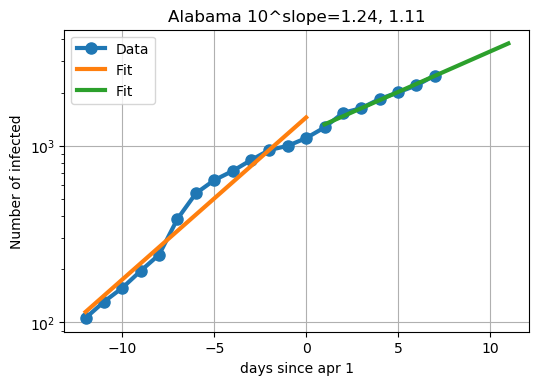

<Figure size 600x400 with 0 Axes>

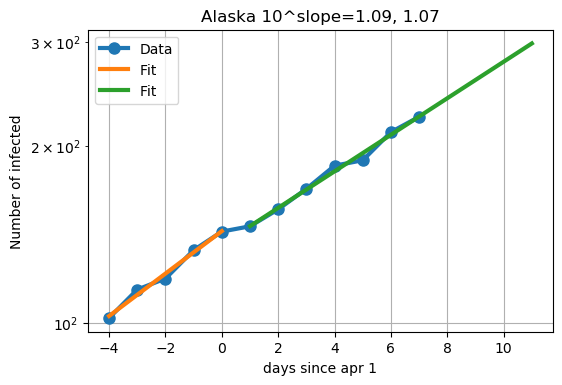

<Figure size 600x400 with 0 Axes>

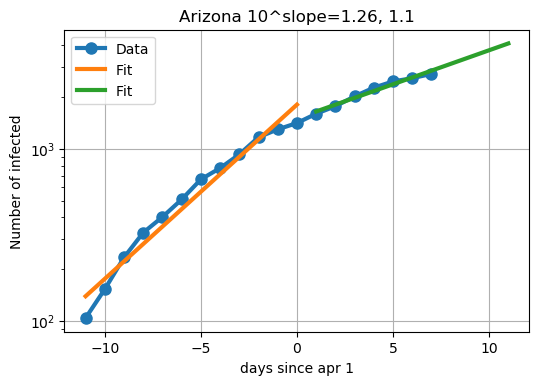

<Figure size 600x400 with 0 Axes>

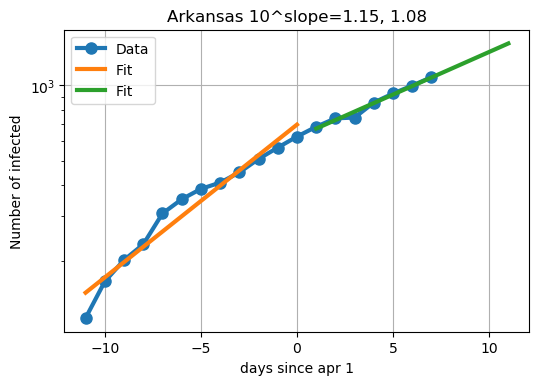

<Figure size 600x400 with 0 Axes>

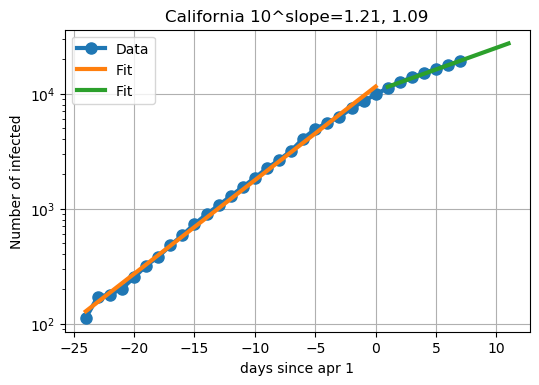

<Figure size 600x400 with 0 Axes>

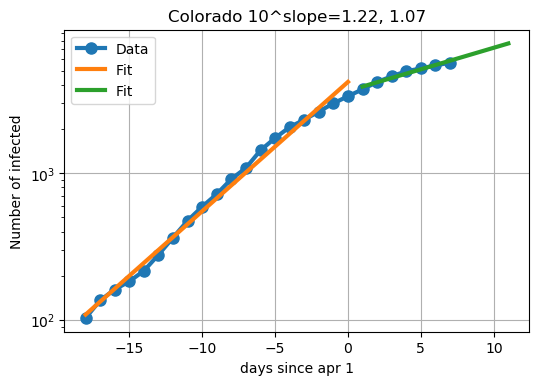

<Figure size 600x400 with 0 Axes>

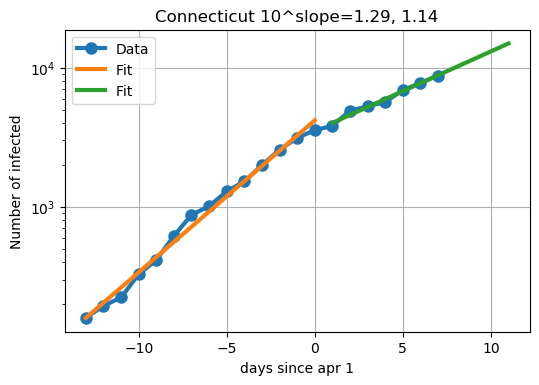

<Figure size 600x400 with 0 Axes>

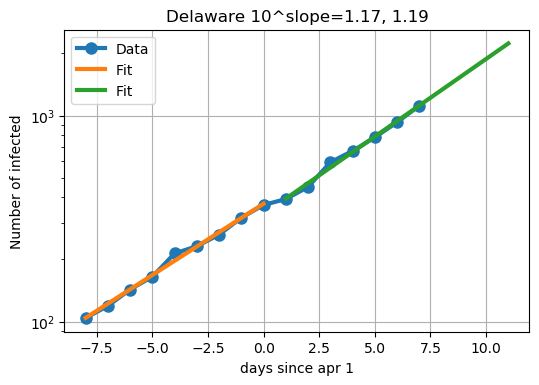

<Figure size 600x400 with 0 Axes>

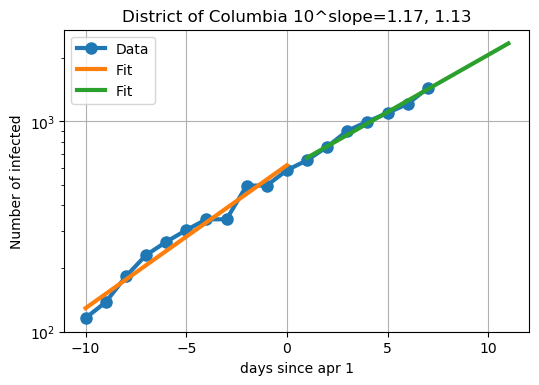

<Figure size 600x400 with 0 Axes>

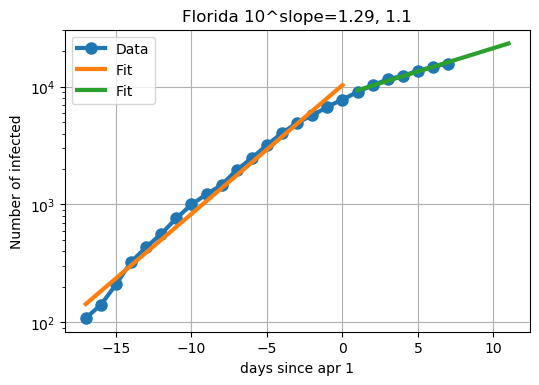

<Figure size 600x400 with 0 Axes>

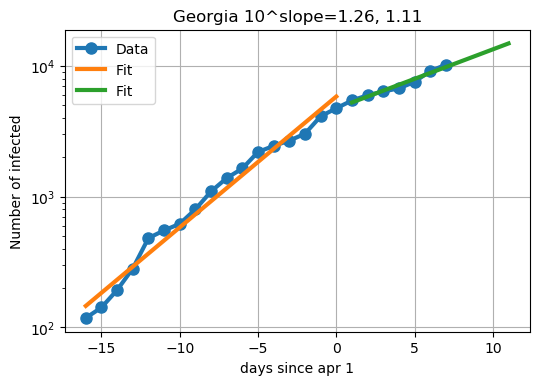

<Figure size 600x400 with 0 Axes>

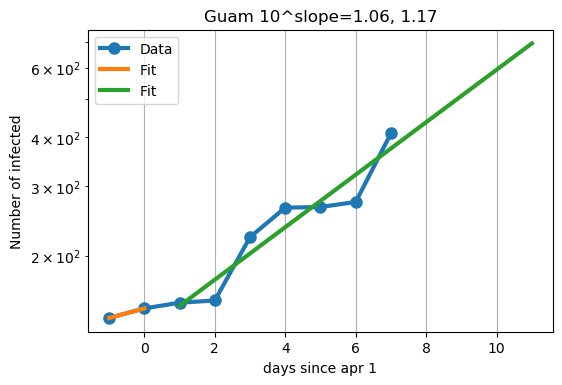

<Figure size 600x400 with 0 Axes>

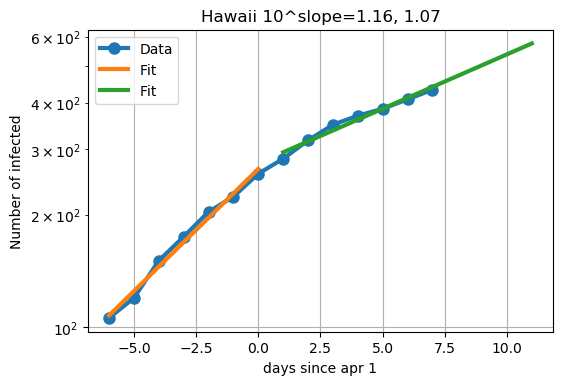

<Figure size 600x400 with 0 Axes>

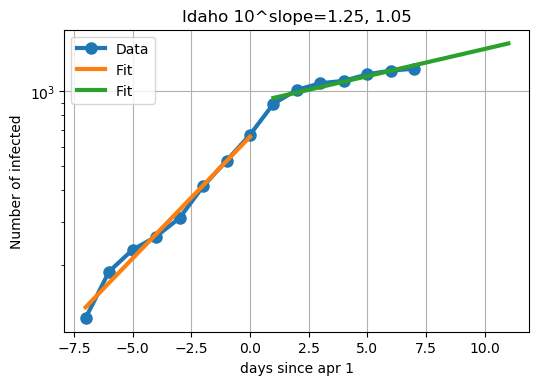

<Figure size 600x400 with 0 Axes>

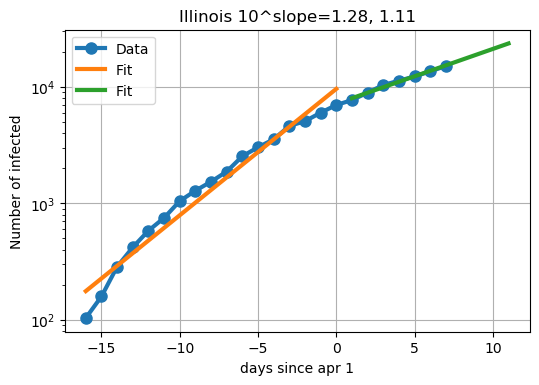

<Figure size 600x400 with 0 Axes>

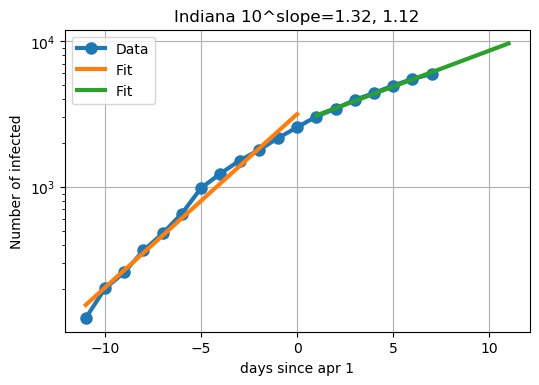

<Figure size 600x400 with 0 Axes>

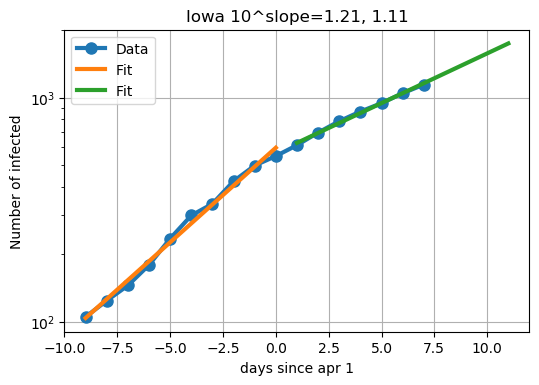

<Figure size 600x400 with 0 Axes>

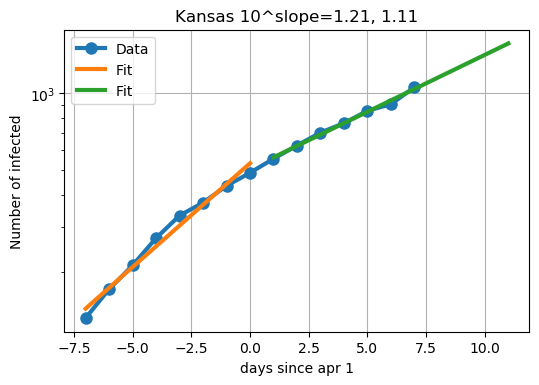

<Figure size 600x400 with 0 Axes>

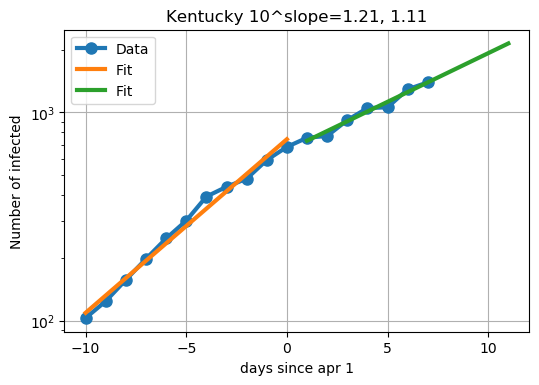

<Figure size 600x400 with 0 Axes>

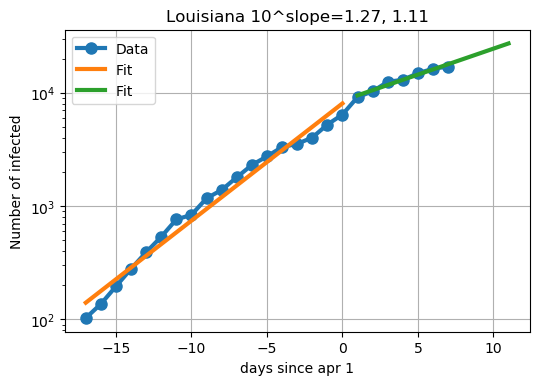

<Figure size 600x400 with 0 Axes>

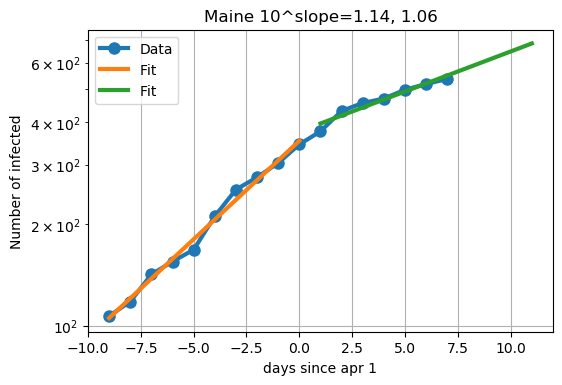

<Figure size 600x400 with 0 Axes>

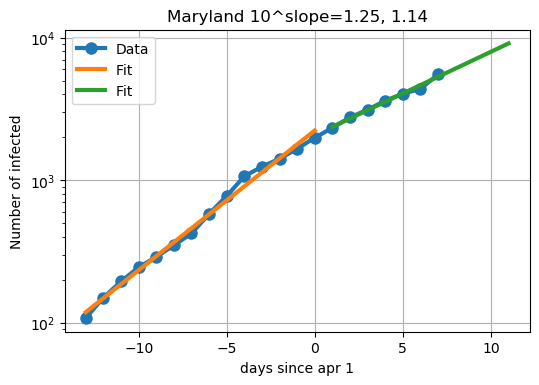

<Figure size 600x400 with 0 Axes>

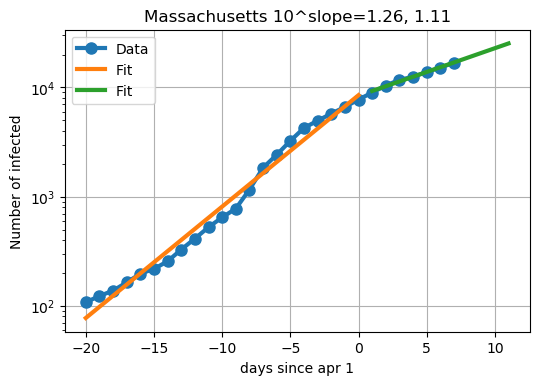

<Figure size 600x400 with 0 Axes>

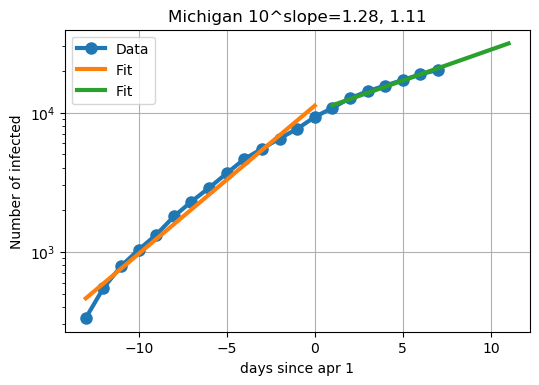

<Figure size 600x400 with 0 Axes>

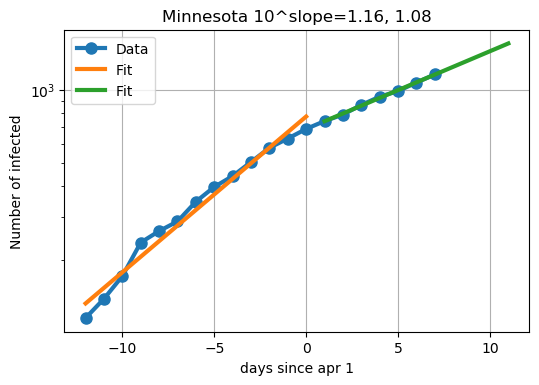

<Figure size 600x400 with 0 Axes>

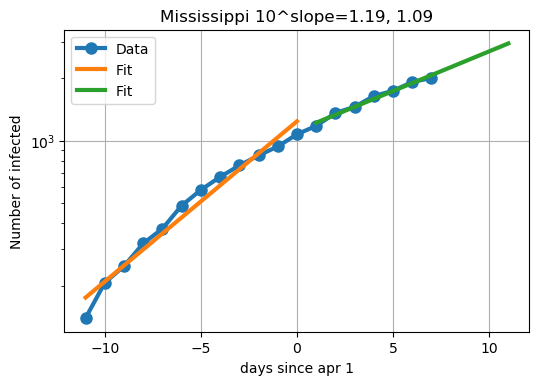

<Figure size 600x400 with 0 Axes>

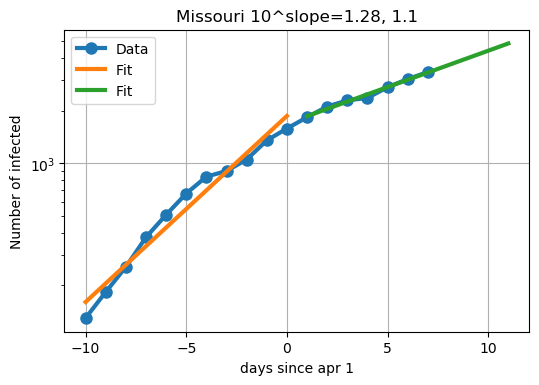

<Figure size 600x400 with 0 Axes>

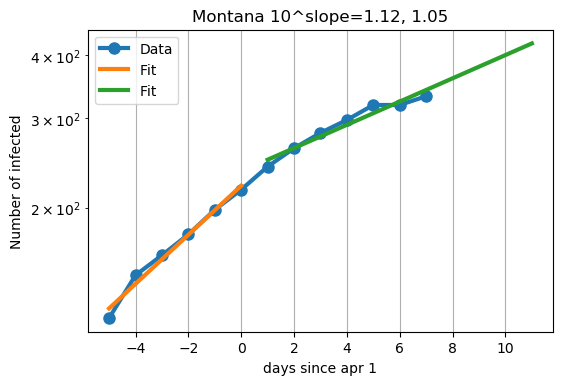

<Figure size 600x400 with 0 Axes>

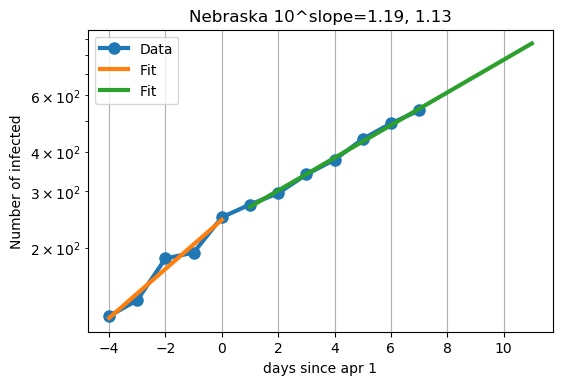

<Figure size 600x400 with 0 Axes>

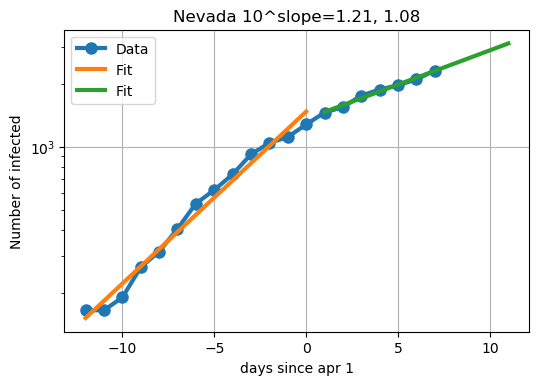

<Figure size 600x400 with 0 Axes>

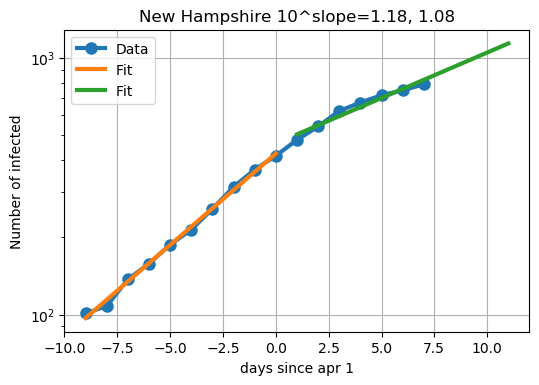

<Figure size 600x400 with 0 Axes>

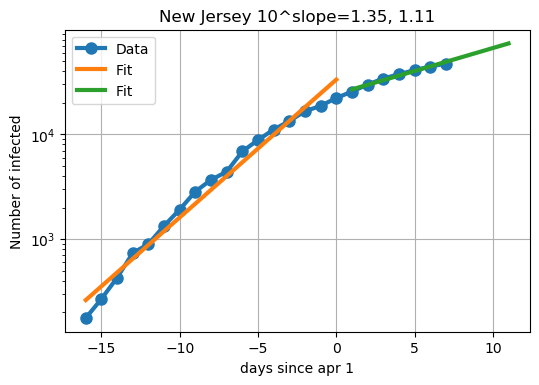

<Figure size 600x400 with 0 Axes>

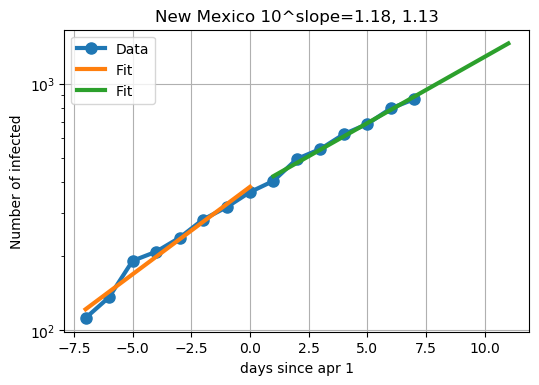

<Figure size 600x400 with 0 Axes>

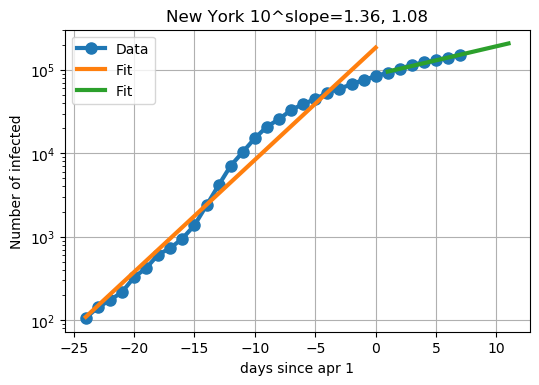

<Figure size 600x400 with 0 Axes>

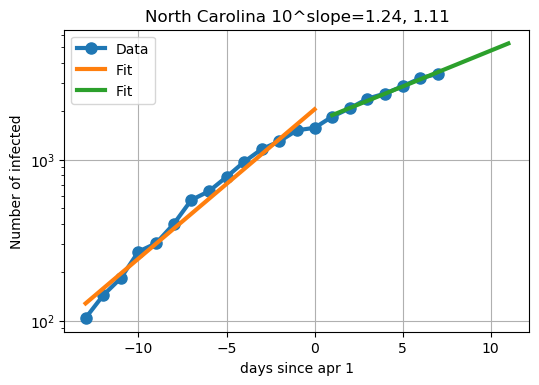

<Figure size 600x400 with 0 Axes>

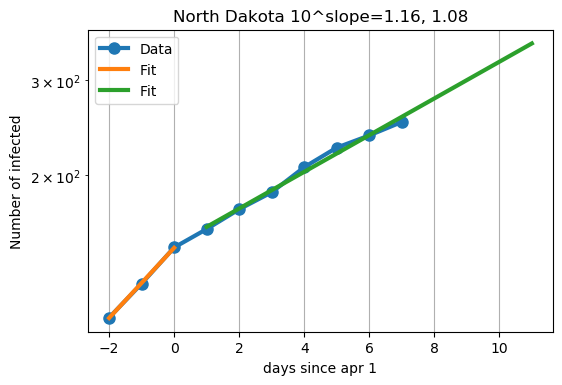

<Figure size 600x400 with 0 Axes>

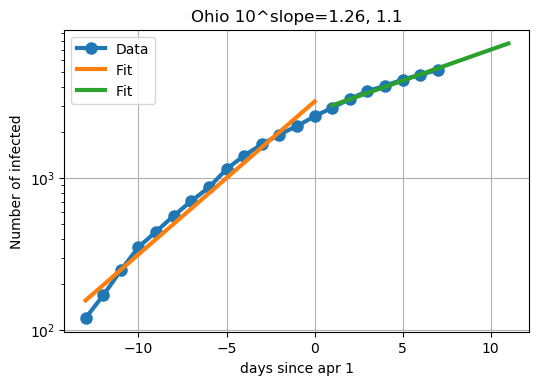

<Figure size 600x400 with 0 Axes>

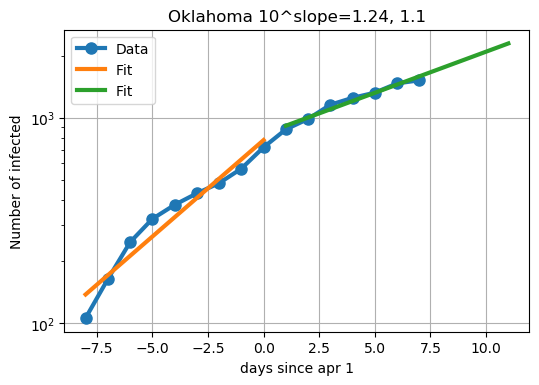

<Figure size 600x400 with 0 Axes>

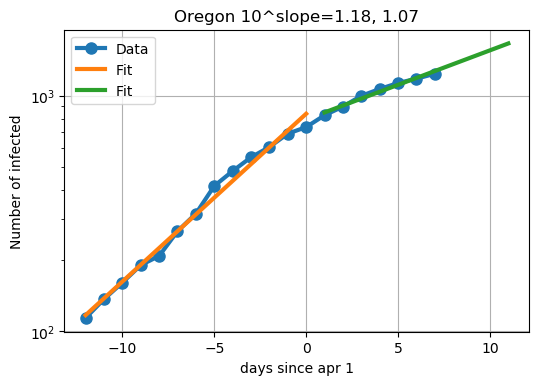

<Figure size 600x400 with 0 Axes>

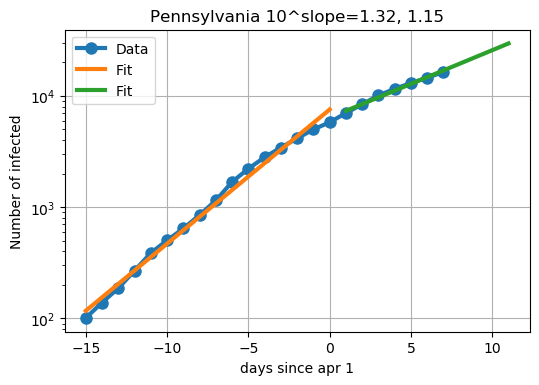

<Figure size 600x400 with 0 Axes>

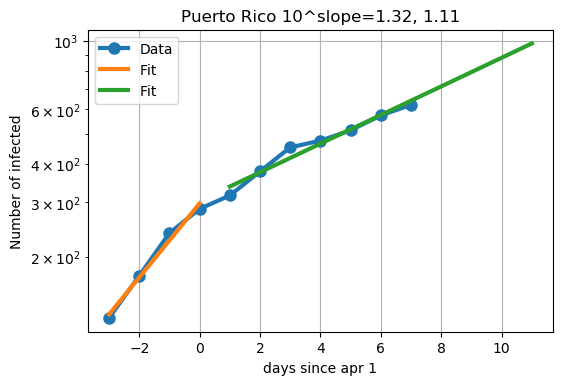

<Figure size 600x400 with 0 Axes>

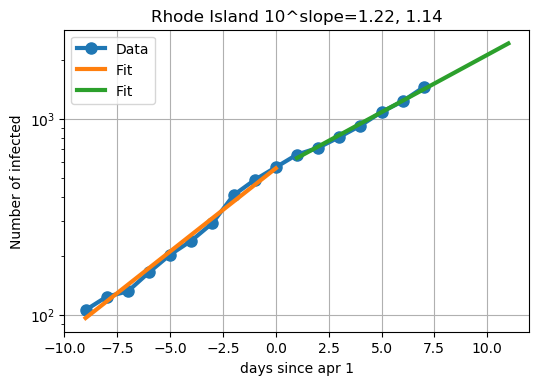

<Figure size 600x400 with 0 Axes>

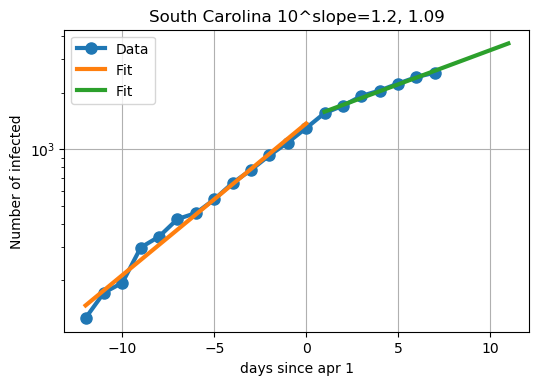

<Figure size 600x400 with 0 Axes>

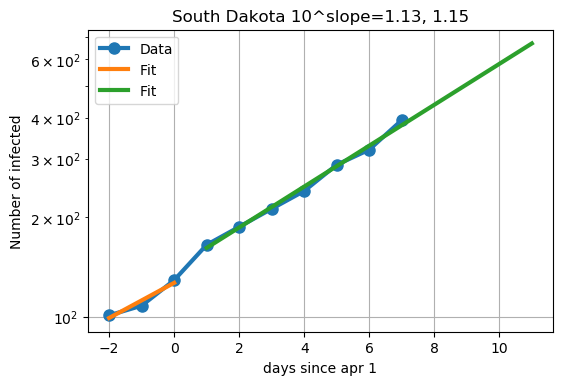

<Figure size 600x400 with 0 Axes>

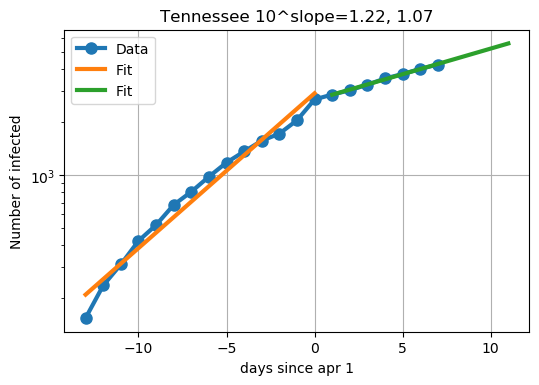

<Figure size 600x400 with 0 Axes>

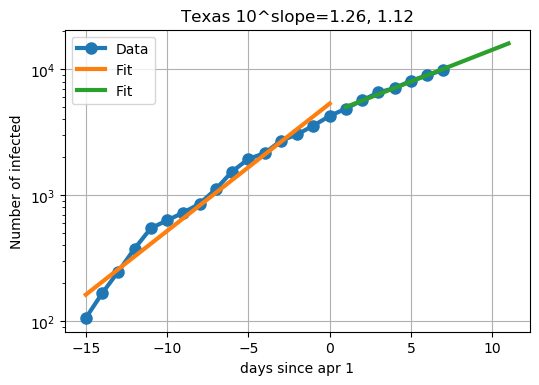

<Figure size 600x400 with 0 Axes>

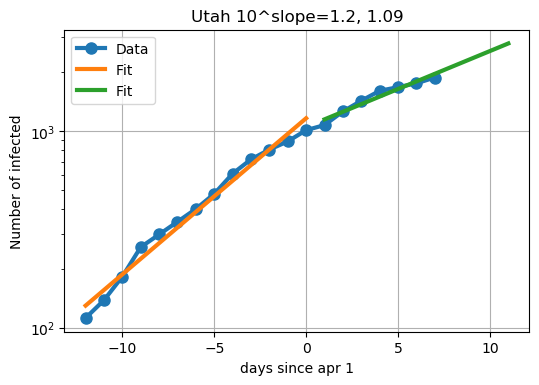

<Figure size 600x400 with 0 Axes>

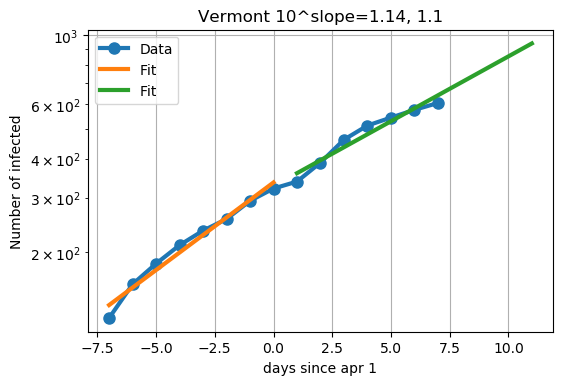

<Figure size 600x400 with 0 Axes>

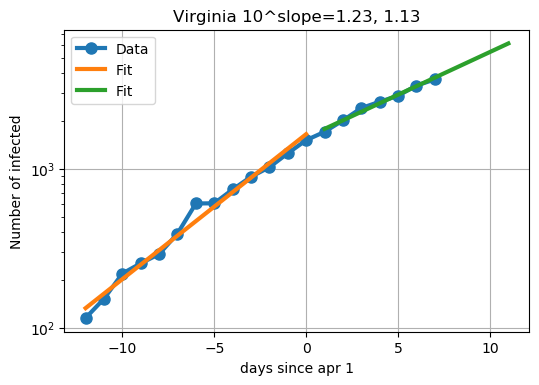

<Figure size 600x400 with 0 Axes>

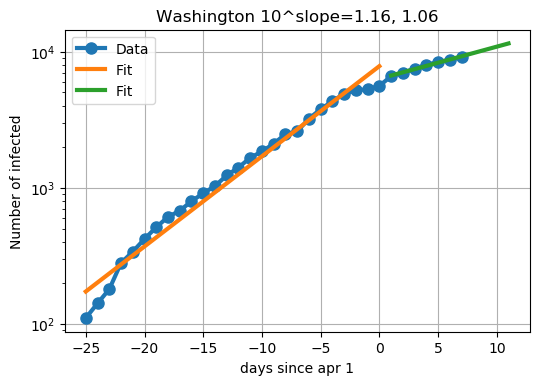

<Figure size 600x400 with 0 Axes>

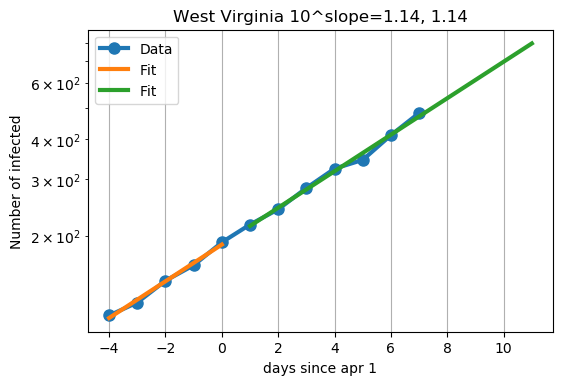

<Figure size 600x400 with 0 Axes>

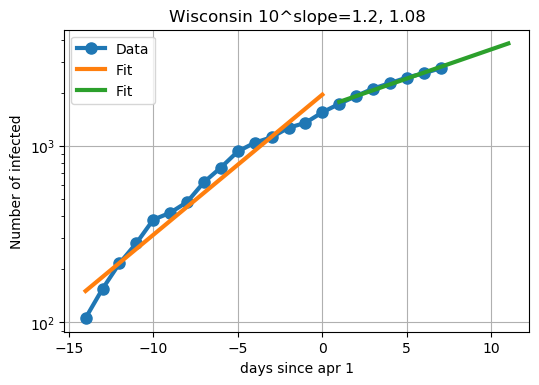

<Figure size 600x400 with 0 Axes>

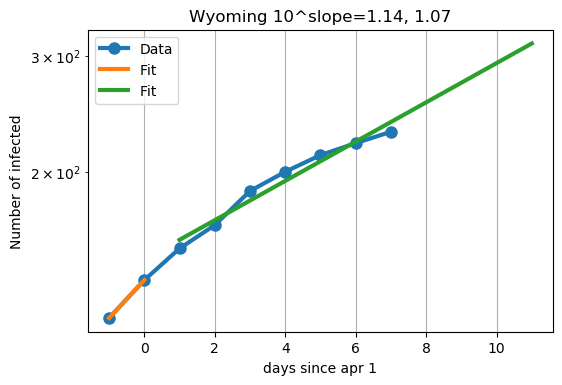

In [50]:
states=df['state'].unique()
states.sort()
fitted_data=[]
for state in states:
#     if state == 'Guam':
#         continue
    if state == 'Northern Mariana Islands':
        continue
    if state == 'Virgin Islands':
        continue
#     if state == 'Wyoming':
#         continue
#     if state == 'North Dakota':
#         continue
#     if state == 'South Dakota':
#         continue
#     if state == 'Puerto Rico':
#         continue
#     if state == 'West Virginia':
#         continue
#     if state == 'Montana':
#         continue
#     if state == 'Alaska':
#         continue
#     if state >= 'Maryland':
#         continue
    x=fit_slope_coef(state)
    fitted_data.append(x)